In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [15]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

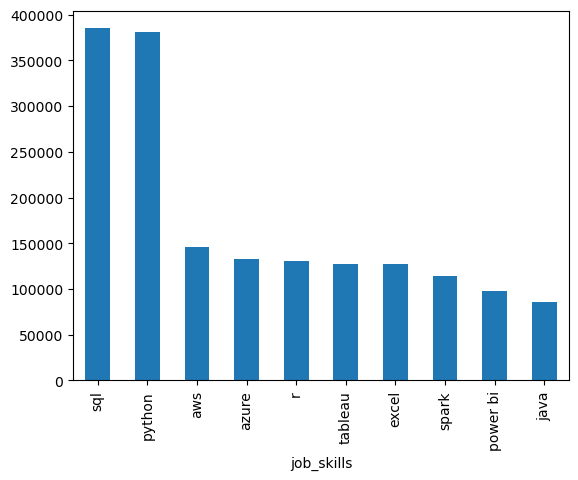

In [17]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

## or better still in one line 👇

<Axes: xlabel='job_skills'>

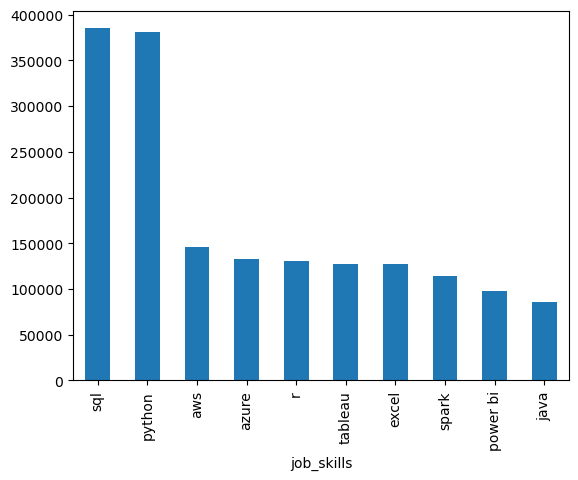

In [18]:
df['job_skills'].explode().value_counts().head(10).plot(kind='bar')

In [34]:
skill_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

type(skill_count)

pandas.core.series.Series

In [ ]:
# to convert the datatype of the skill_count from a series to dataframe with reset_index() and then sort the values
df_skill_count = skill_count.reset_index(name='skill_count').sort_values(by='skill_count', ascending=False)

df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


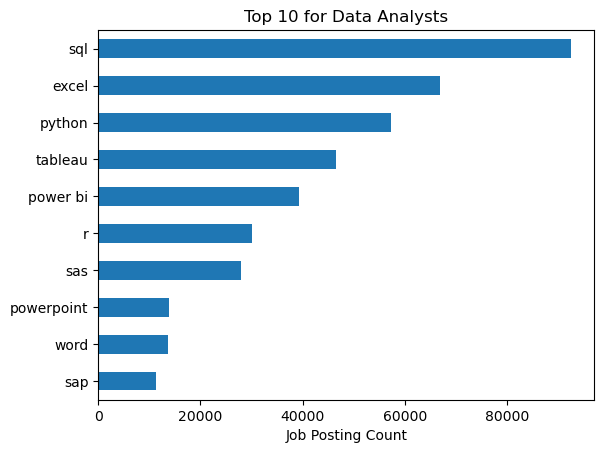

In [46]:
# create a plot with individual variable so its easy to change when i want to see other titles
job_title = 'Data Analyst'
top_skills = 10

df_skill_final = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()